In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn import preprocessing
import requests
import io

In [2]:
tf.__version__

'2.3.0'

### Preprocesamos la info

In [3]:
url = "https://raw.githubusercontent.com/joanby/tensorflow/master/datasets/birthweight.dat?token=AMRAeMNwZBLC86UzdMdxEuhlGPMufKa5ks5cVIdzwA%3D%3D"
urlData = requests.get(url).content

In [4]:
rawData = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep='\t')

In [5]:
rawData

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,BWT
0,1,28,113,1,1,1,0,1,709
1,1,29,130,0,0,0,0,1,1021
2,1,34,187,1,1,0,1,0,1135
3,1,25,105,1,0,1,1,0,1330
4,1,25,85,1,0,0,0,1,1474
...,...,...,...,...,...,...,...,...,...
184,0,31,120,0,0,0,0,0,4167
185,0,35,170,0,0,1,0,0,4174
186,0,19,120,0,1,0,1,0,4238
187,0,24,216,0,0,0,0,0,4593


### Normalizamos la info

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()

In [7]:
data_scaled = min_max_scaler.fit_transform(rawData.values)

In [8]:
data_scaled

array([[1.        , 0.4516129 , 0.19411765, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.48387097, 0.29411765, ..., 0.        , 1.        ,
        0.07288017],
       [1.        , 0.64516129, 0.62941176, ..., 1.        , 0.        ,
        0.09950946],
       ...,
       [0.        , 0.16129032, 0.23529412, ..., 1.        , 0.        ,
        0.82434011],
       [0.        , 0.32258065, 0.8       , ..., 0.        , 0.        ,
        0.90726466],
       [0.        , 1.        , 0.25294118, ..., 0.        , 0.        ,
        1.        ]])

### Separamos Conjunto de Train y Test

In [9]:
train_vals, test_vals = train_test_split(data_scaled, test_size = 0.2, random_state = 0)

In [10]:
train_vals.shape

(151, 9)

In [11]:
test_vals.shape

(38, 9)

In [21]:
X_train = train_vals[:,1:9]
y_train = train_vals[:,0]

X_test = test_vals[:,1:9]
y_test = test_vals[:,0]

In [13]:
y_train

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.])

In [14]:
X_train

array([[0.25806452, 0.29411765, 0.        , ..., 0.        , 0.        ,
        0.56598925],
       [0.32258065, 0.30588235, 1.        , ..., 1.        , 0.        ,
        0.23826209],
       [0.16129032, 0.30588235, 1.        , ..., 0.        , 0.        ,
        0.55617846],
       ...,
       [0.19354839, 0.13529412, 1.        , ..., 0.        , 0.        ,
        0.58257416],
       [0.09677419, 0.23529412, 0.        , ..., 0.        , 0.        ,
        0.39827143],
       [0.61290323, 0.21764706, 0.        , ..., 0.        , 1.        ,
        0.74818968]])

### Capas

In [15]:
input_layer = layers.Input(shape=(X_train.shape[1],))
dense_layer_1 = layers.Dense(64, activation='relu')(input_layer)
dense_layer_2 = layers.Dense(32, activation='relu')(dense_layer_1)
output = layers.Dense(1, activation='sigmoid')(dense_layer_2)

In [16]:
model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model.fit(X_train, y_train, batch_size=25, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 0s 32ms/step - loss: 0.7532 - acc: 0.3333 - val_loss: 0.7670 - val_acc: 0.2581
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.7248 - acc: 0.3333 - val_loss: 0.7271 - val_acc: 0.1935
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6978 - acc: 0.3917 - val_loss: 0.6968 - val_acc: 0.5484
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6785 - acc: 0.6667 - val_loss: 0.6716 - val_acc: 0.6774
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6623 - acc: 0.7417 - val_loss: 0.6515 - val_acc: 0.8065
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6489 - acc: 0.7750 - val_loss: 0.6332 - val_acc: 0.8065
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6353 - acc: 0.7333 - val_loss: 0.6174 - val_acc: 0.8065
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6227 - acc: 0.7250 - va

Epoch 64/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1650 - acc: 0.9333 - val_loss: 0.4444 - val_acc: 0.8065
Epoch 65/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1619 - acc: 0.9333 - val_loss: 0.4429 - val_acc: 0.8065
Epoch 66/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1585 - acc: 0.9417 - val_loss: 0.4503 - val_acc: 0.8387
Epoch 67/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1566 - acc: 0.9417 - val_loss: 0.4414 - val_acc: 0.8065
Epoch 68/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1542 - acc: 0.9417 - val_loss: 0.4378 - val_acc: 0.8387
Epoch 69/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1503 - acc: 0.9500 - val_loss: 0.4380 - val_acc: 0.8387
Epoch 70/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1475 - acc: 0.9500 - val_loss: 0.4382 - val_acc: 0.8387
Epoch 71/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1452 - acc: 0.95

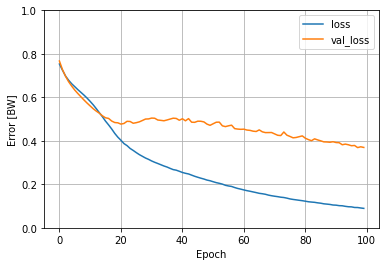

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error [BW]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2/2 [==============================] - 0s 999us/step - loss: 0.1586 - acc: 0.9474
Test Score: 0.1585596203804016
Test Accuracy: 0.9473684430122375


In [23]:
resy = model.predict(X_test)

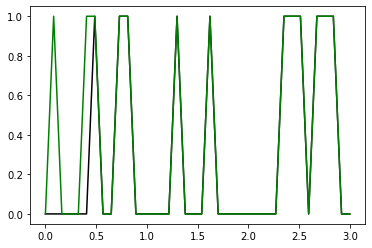

In [34]:
x = tf.linspace(0.0, 3, 38)
plt.plot(x, y_test, color='k', label='Posta')
plt.plot(x, resy, color='g', label='Posta')

In [28]:
y_test

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0.])

In [32]:
resy = np.round(resy,decimals=0)

In [33]:
resy

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]], dtype=float32)